In [25]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
import cProfile
import pstats
import numpy as np
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image  
plt.rcParams['figure.figsize'] = [10, 10]

In [312]:
#densityMap = '''$@@B%8&WMM###HoahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`'.           '''
#densityMap = '#@&HX0OI1l;:_,.'
densityMap = '@&##HHIIOO;;::,,... '
#densityMap = 'Ñ@&#eaO|!*+;:=-,._ '
densityMap = np.array( list( densityMap ) )

In [313]:
len( densityMap )

20

In [314]:
def getImage( path ):
    img = cv2.imread( path, 0 )
    img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
    img = cv2.resize( img, ( 400, 400 ) )
    return img

In [315]:
def deStackImage( img ):
    return img[:,:,1].astype('float64')

In [316]:
def normalizeImage( img, max_, inplace = True ):
    if inplace:
        img *= float(max_)/img.max()
        return img.astype(int)
    return ( img * float(max_)/img.max() ).astype(int)

In [317]:
def getasciiArray( img, map_ ):
    return map_[img]

In [318]:
def getBlankImageFromReferenceImage( img, base, scaleby ):
    width = int( 1300 * img.shape[1] * scaleby )
    height = int( 1500 * img.shape[0] * scaleby )
    return Image.fromarray( np.full( ( height, width, 3 ), 255, dtype = np.uint8 ) )

In [319]:
def writeAsciiArrayOnBlankImage( asciiArray, font ):
    img = getBlankImageFromReferenceImage( asciiArray, 255, 0.01 )
    draw = ImageDraw.Draw( img )
    for i,row in enumerate( asciiArray ):
        org = (0, 15 * i)
        text = ''.join( row )
        draw.text( org, text, font=font, fill=(0, 0, 0) )
    return img

In [320]:
def pilToCV2( pilImage ):
    return cv2.cvtColor(np.array(pilImage), cv2.COLOR_RGB2BGR)

In [328]:
def main():
    img         = getImage( 'jupiter.jpg' )
    img_        = normalizeImage( deStackImage( img ), len( densityMap ) - 1, inplace = False )
    asciiArray  = getasciiArray( img_, densityMap )
    img_        = writeAsciiArrayOnBlankImage( asciiArray, font = ImageFont.truetype("consola.ttf", 24) )
    opencvImage = pilToCV2( img_ )
    return img, img_, opencvImage

In [329]:
with cProfile.Profile() as profile:
    img, img_, opencvImage = main()

In [330]:
stats = pstats.Stats( profile ).strip_dirs().sort_stats("cumtime")
stats.print_stats(20)

         9154 function calls (9153 primitive calls) in 9.619 seconds

   Ordered by: cumulative time
   List reduced from 95 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    9.619    9.619 3289677812.py:1(main)
        1    0.009    0.009    9.475    9.475 3931411922.py:1(writeAsciiArrayOnBlankImage)
      400    0.006    0.000    9.351    0.023 ImageDraw.py:355(text)
      400    0.011    0.000    9.340    0.023 ImageDraw.py:402(draw_text)
      400    0.010    0.000    8.118    0.020 ImageFont.py:593(getmask2)
      400    5.127    0.013    5.127    0.013 {method 'render' of 'Font' objects}
      400    2.973    0.007    2.973    0.007 {method 'getsize' of 'Font' objects}
      400    1.210    0.003    1.210    0.003 {method 'draw_bitmap' of 'ImagingDraw' objects}
        1    0.009    0.009    0.135    0.135 174053031.py:1(pilToCV2)
      2/1    0.048    0.024    0.108    0.108 {built-in method nump

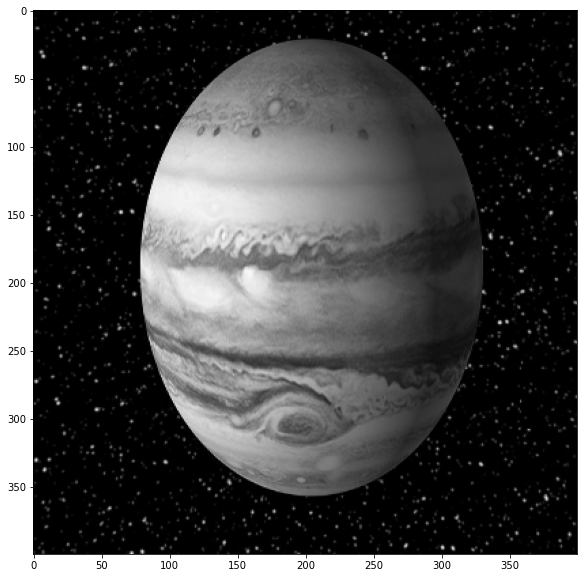

In [331]:
plt.imshow(img)

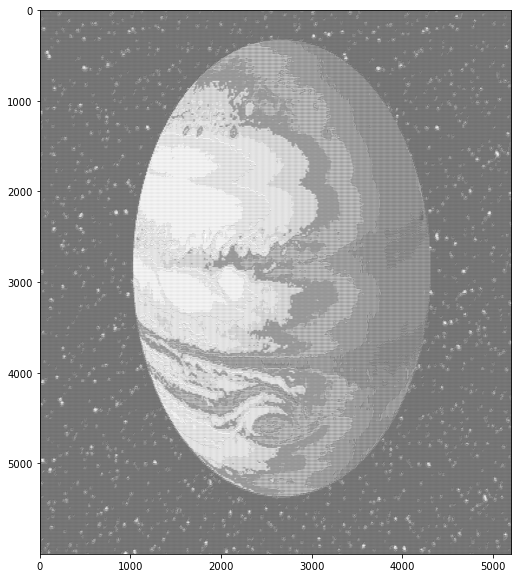

In [332]:
plt.imshow(opencvImage)

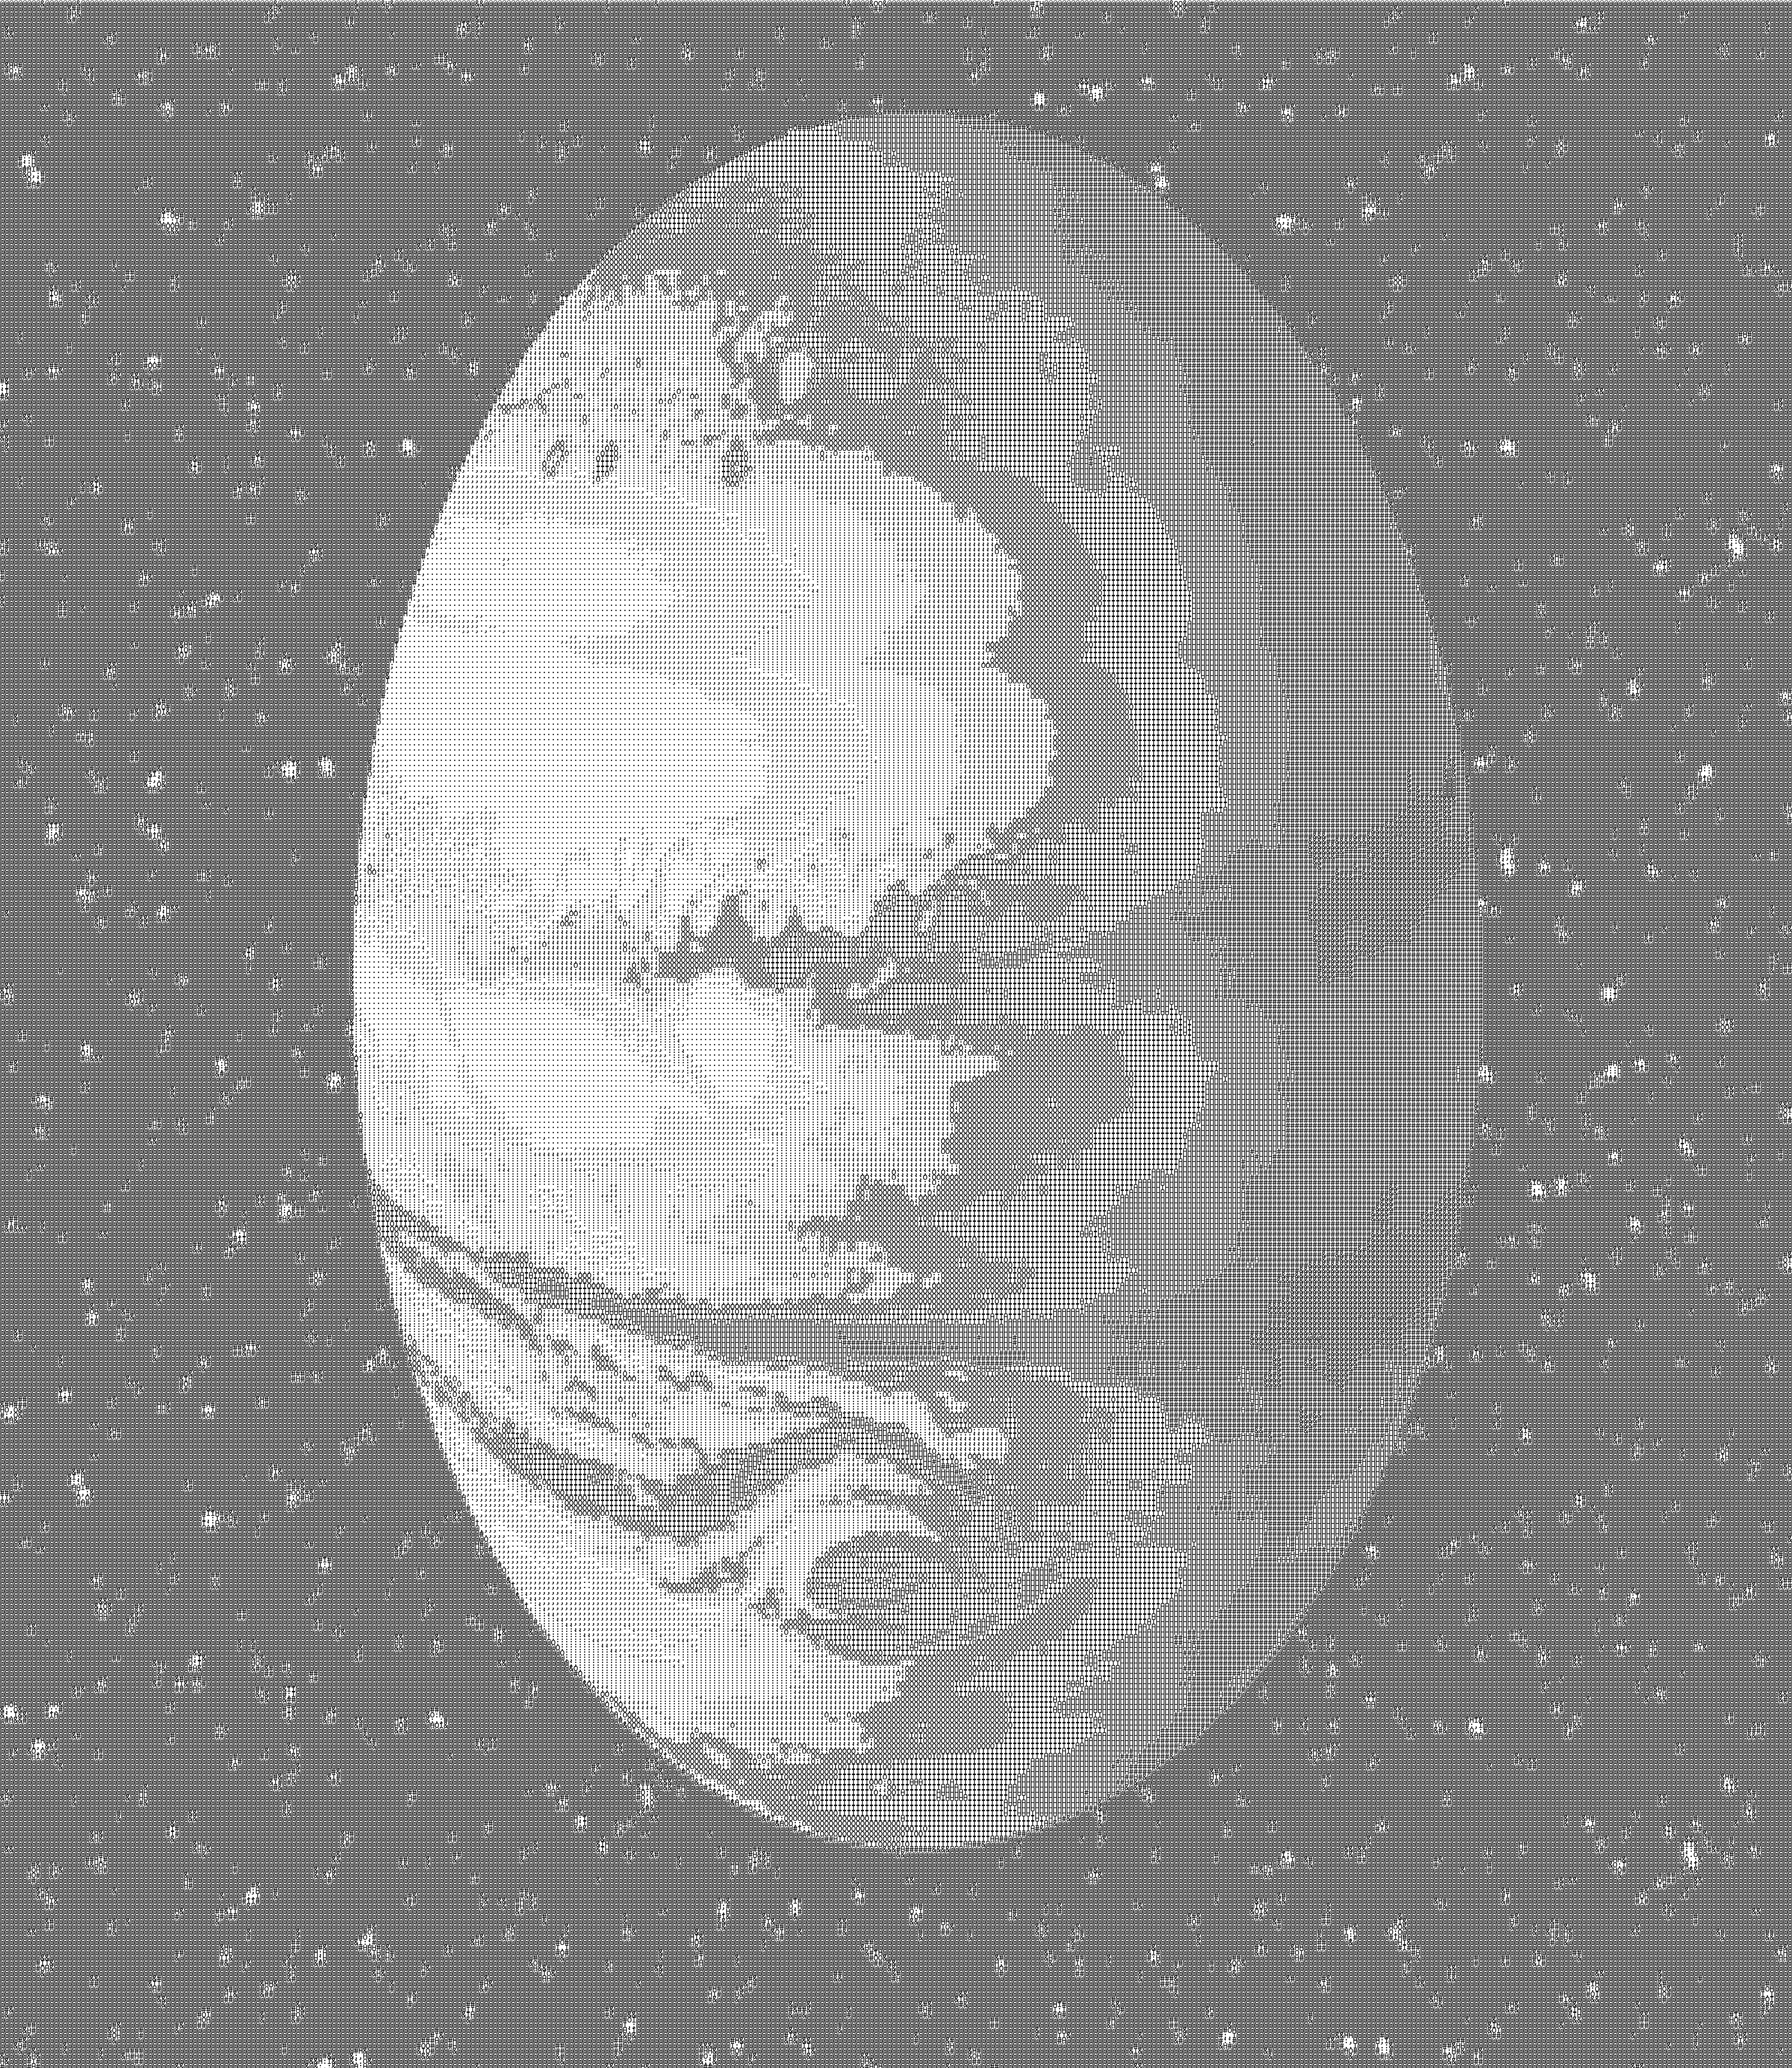

In [333]:
img_

In [334]:
opencvImage.shape

(6000, 5200, 3)